In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Context Of Dataset
The Sleep Health and Lifestyle Dataset, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

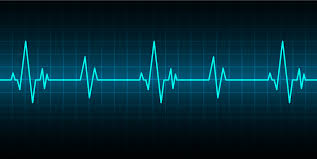

In [2]:
df=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activit_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.tail()

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activit_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
df.shape

(374, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Person_ID               374 non-null    int64  
 1   Gender                  374 non-null    object 
 2   Age                     374 non-null    int64  
 3   Occupation              374 non-null    object 
 4   Sleep_Duration          374 non-null    float64
 5   Quality_of_Sleep        374 non-null    int64  
 6   Physical_Activit_Level  374 non-null    int64  
 7   Stress_Level            374 non-null    int64  
 8   BMI_Category            374 non-null    object 
 9   Blood_Pressure          374 non-null    object 
 10  Heart_Rate              374 non-null    int64  
 11  Daily_Steps             374 non-null    int64  
 12  Sleep_Disorder          374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person_ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep_Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality_of_Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical_Activit_Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress_Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart_Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily_Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


# Exploratory Data Analysis

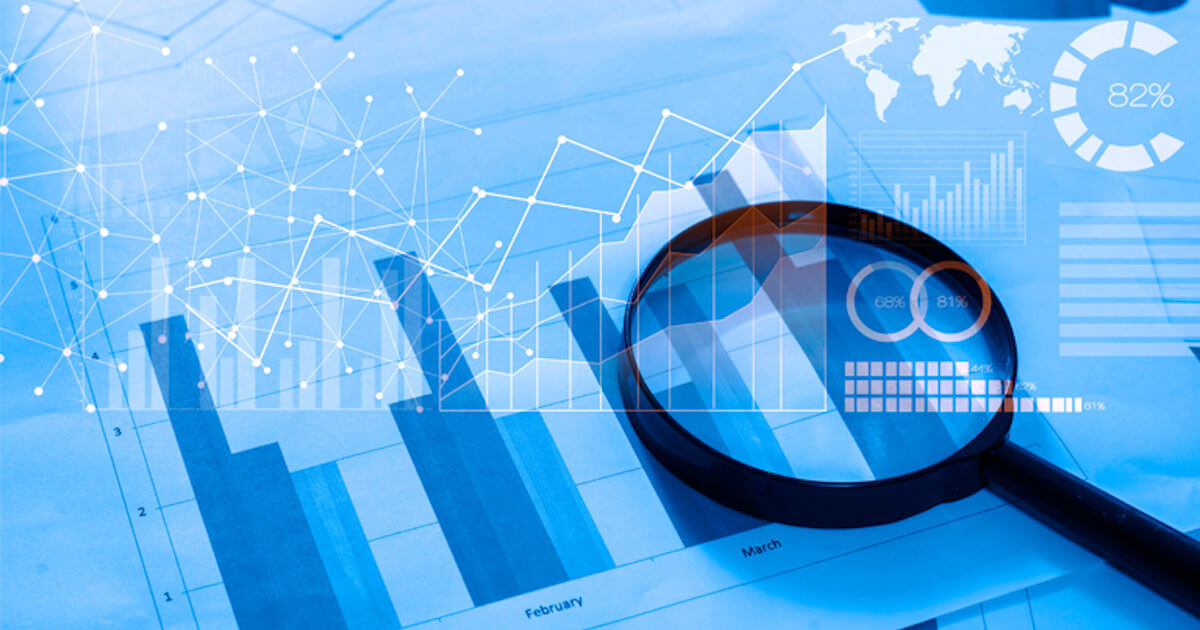

In [17]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [60]:
df["Gender"].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

In [11]:
round(df["Age"].mean(),2)

42.18

The mean age of gender is 42

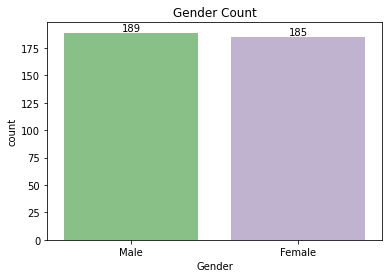

In [65]:
ax=sns.countplot(data=df,x="Gender",palette="Accent")
ax.bar_label(ax.containers[0])
plt.title("Gender Count")
plt.show()

In [19]:
df.Occupation.unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Manager'], dtype=object)

In [20]:
df.Occupation.nunique()

10

In [18]:
df.BMI_Category.unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [37]:
df.Sleep_Disorder.unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

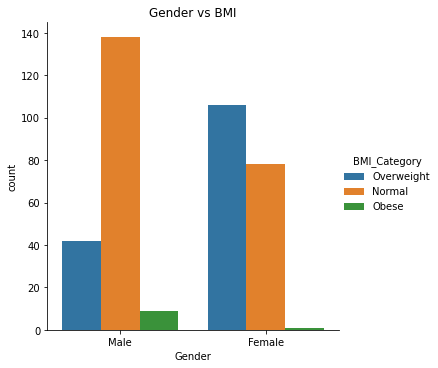

In [100]:
a=sns.catplot(data=df,x="Gender",hue="BMI_Category",kind="count")
plt.title("Gender vs BMI")
plt.show()

From the above chart we can analyse that the problem of overweight is more among women than men, while obesity is slightly higher in male, at the same time men have normal weight while women are overweight overall

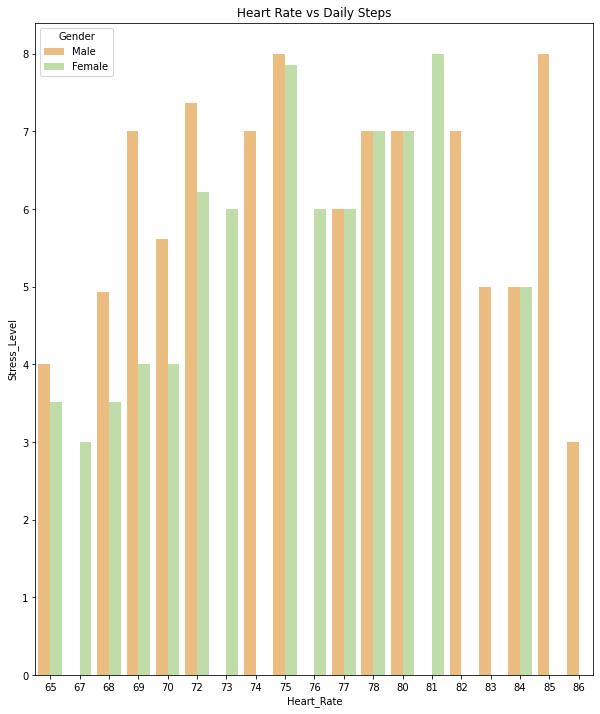

In [33]:
plt.figure(figsize=(10,12))
sns.barplot(data=df,y="Stress_Level",x="Heart_Rate",hue="Gender",palette="Spectral",ci=False)
plt.title("Heart Rate vs Daily Steps")
plt.show()

# Top & Bottom Occupation vs Stress level

In [113]:
df[['Occupation','Stress_Level','Gender']].sort_values(by='Stress_Level', ascending = False).head(10)

,Occupation,Stress_Level,Gender
64,Doctor,8,Male
62,Doctor,8,Male
60,Doctor,8,Male
270,Nurse,8,Female
58,Doctor,8,Male
57,Doctor,8,Male
271,Nurse,8,Female
55,Doctor,8,Male
54,Doctor,8,Male
272,Nurse,8,Female


In [114]:
df[['Occupation','Stress_Level','Gender']].sort_values(by='Stress_Level', ascending = True).head(10)

,Occupation,Stress_Level,Gender
373,Nurse,3,Female
322,Engineer,3,Female
51,Engineer,3,Male
50,Engineer,3,Male
323,Engineer,3,Female
324,Engineer,3,Female
325,Engineer,3,Female
321,Engineer,3,Female
326,Engineer,3,Female
328,Engineer,3,Female


The above two comaprison clearly states the occupation of Doctor is highly stressfull over other occupations while engineering being least stressfull, irrespective of gender.

# Physical Activity vs Stress Level based on Gender

In [9]:
df[['Physical_Activit_Level','Stress_Level','Gender']].sort_values(by='Physical_Activit_Level', ascending = False).head(10)

,Physical_Activit_Level,Stress_Level,Gender
271,90,8,Female
207,90,5,Male
213,90,5,Male
212,90,5,Male
211,90,5,Male
210,90,5,Male
209,90,5,Male
208,90,5,Male
206,90,5,Male
278,90,8,Female


In [10]:
df[['Physical_Activit_Level','Stress_Level','Gender',]].sort_values(by='Physical_Activit_Level', ascending = True).head(10)

,Physical_Activit_Level,Stress_Level,Gender
73,30,8,Male
55,30,8,Male
54,30,8,Male
300,30,3,Female
52,30,8,Male
301,30,3,Female
79,30,8,Male
299,30,3,Female
251,30,6,Female
313,30,3,Female


From the above analysis of Physical Acitivity Level it highlights the inverse relationship based on female gender where 
though female physical activity is higher her stress is still the highest while in men it is directly proportional less
physical activity, higher the stress.

# Age vs Stress Level

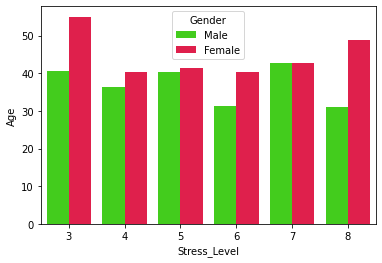

In [54]:
ax=sns.barplot(data=df,x="Stress_Level",y="Age",hue="Gender",palette="prism",ci=False)
plt.show()

The above graph provides key insights to stress level among genders & the stress level of female is always higher 
irrespective of age

# Stress Level vs Sleep Duration

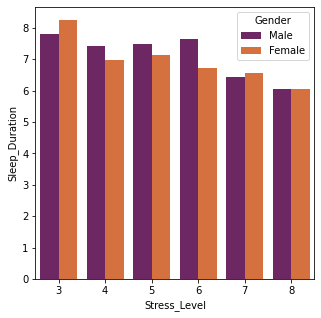

In [57]:
plt.figure(figsize=(5,5))
ax=sns.barplot(data=df,x="Stress_Level",y="Sleep_Duration",hue="Gender",palette="inferno",ci=False)
plt.show()

In [26]:
round(df["Stress_Level"].mean(),2)

5.39

Number of hours of sleep holds almost negligible importance since stress level is still higher than average ie 5.39 but it 
also highlights that avg +1 and avg-1, male gets more sleep

# Sleep Disorder vs Age

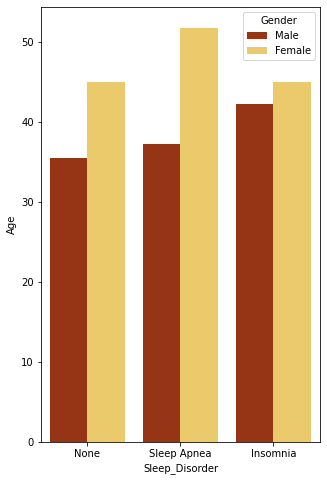

In [64]:
plt.figure(figsize=(5,8))
sns.barplot(data=df,x="Sleep_Disorder",y="Age",hue="Gender",ci=None,palette="afmhot")
plt.show()

The above mentioned graph clearly depicts that both Sleep Apnea and Insomnia is high among female over male also while
Sleep Apnea is higher among Female, Insomnia is higher among Male

# Blood Pressure vs Age

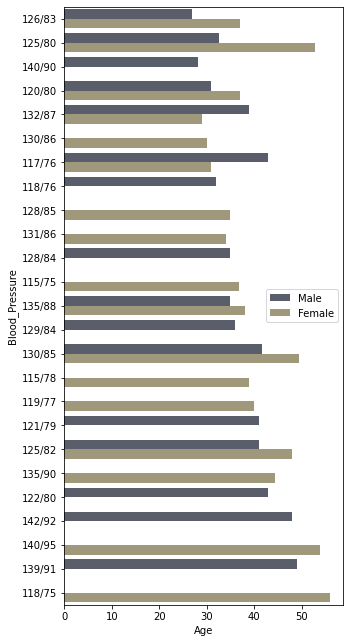

In [99]:
plt.figure(figsize=(5,11))
sns.barplot(data=df,x="Age",y="Blood_Pressure",hue="Gender",ci=None,palette="cividis")
plt.legend(loc='center right')
plt.show()

The Blood Pressure relatively remains higher among female group